# Integration

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math
import pandas as pd
import scipy
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from scipy import stats
import sympy as sy

### Ex 14.1

In [23]:
def g_1(x):
    output = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return output

In [ ]:
test = np.array()

In [45]:
def p_1(g, a, b, N, method):
    
    
    if method == 'midpoint':
        i = np.linspace(0, N, N)
        dom = a + (2*i+1)*(b-a)/(2*N)
        out = ((b-a)/N)*(g(dom).sum())
    
    elif method == 'trapezoid':
        i = np.linspace(0, N, N)
        dom = a + i*(b-a)/N
        out = ((b-a)/(2*N))*(g(dom[0])
                           + 2*(g(dom[1:N-1]).sum())
                           + g(dom[N-1]))
        
    elif method == 'simpson':
        i = np.linspace(0, 2*N, 2*N)
        dom = a + i*(b-a)/(2*N)
        out = ((b-a)/(6*(N+1)))*(g(dom[0])
                               + 4*(g(dom[1:2*N-1:2]).sum())
                               + 2*(g(dom[2:2*N-2:2]).sum())
                               + g(dom[2*N-1]))
    
    else:
        print('Please enter a correct method')
    
    return out

In [49]:
p_1(g_1, -10.0, 10.0, 1000, method='midpoint')

4360.448450763388

In [50]:
p_1(g_1, -10.0, 10.0, 1000, method='trapezoid')

4368.987400723368

In [51]:
p_1(g_1, -10, 10.0, 1000, method='simpson')

4371.032505588872

### Ex 14.2

In [57]:
def p_2(mu, sigma, N, k):
    nodes = np.linspace(mu - k*sigma, mu + k*sigma, N)
    
    w = np.zeros(N)
    
    w[0] = stats.norm.cdf((nodes[0]+nodes[1])/2, mu, sigma)
    
    zmin = (nodes[0:N-2] + nodes[1:N-1])/2
    zmax = (nodes[1:N-1] + nodes[2:N])/2
    w[1:N-1] = stats.norm.cdf(zmax, mu, sigma) - stats.norm.cdf(zmin, mu, sigma)
    
    w[N-1] = 1 - stats.norm.cdf((nodes[N-1]+nodes[N-2])/2, mu, sigma)
    
    return nodes, w

In [58]:
nodes_2, w_2 = p_2(0, 1, 11, 2)

In [59]:
nodes_2

array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ])

In [60]:
w_2

array([0.03593032, 0.04482634, 0.07789859, 0.11559786, 0.14648717,
       0.15851942, 0.14648717, 0.11559786, 0.07789859, 0.04482634,
       0.03593032])

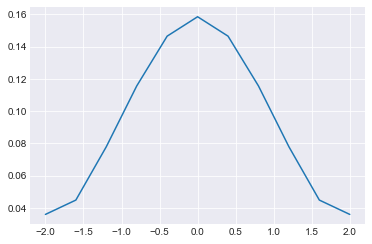

In [61]:
plt.plot(nodes_2, w_2)
plt.show()

### Ex 14.3

In [62]:
def p_3(mu, sigma, N, k):
    nodes, w = p_2(mu, sigma, N, k)
    return np.exp(nodes), w

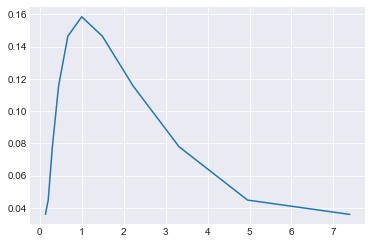

In [64]:
nodes_3, w_3 = p_3(0, 1, 11, 2)
plt.plot(nodes_3, w_3)
plt.show()

### Ex 14.4

In [65]:
nodes_4, w_4 = p_3(10.5, 0.8, 100, 2)
expected = (nodes_4*w_4).sum()
expected

48389.882859453224

In [66]:
np.exp(10.5 + 0.5*0.8**2)

50011.087008521754

### Ex 14.5

In [46]:
def err_5(params): #Return a bunch of errors that we try to minimize
    w_1, w_2, w_3, x_1, x_2, x_3 = params
    a = -10.0
    b = 10.0
    
    err_vec = np.zeros(6)
    err_vec[0] = (b-a) - (w_1
                          + w_2
                          + w_3)
    err_vec[1] = (0.5*b**2 - 0.5*a**2) - (w_1*x_1
                                          + w_2*x_2
                                          + w_3*x_3)
    err_vec[2] = (1/3)*(b**3 - a**3) - (w_1*x_1**2
                                        + w_2*x_2**2
                                        + w_3*x_3**2)
    err_vec[3] = (1/4)*(b**4 - a**4) - (w_1*x_1**3
                                        + w_2*x_2**3
                                        + w_3*x_3**3)
    err_vec[4] = (1/5)*(b**5 - a**5) - (w_1*x_1**4
                                        + w_2*x_2**4
                                        + w_3*x_3**4)
    err_vec[5] = (1/6)*(b**6 - a**6) - (w_1*x_1**5
                                        + w_2*x_2**5
                                        + w_3*x_3**5)
    return err_vec

In [65]:
params_init_5 = np.array([0.5, 1, 0.5, 1, 1, 1])
err_5(params_init_5)

array([ 1.80000000e+01, -2.00000000e+00,  6.64666667e+02, -2.00000000e+00,
        3.99980000e+04, -2.00000000e+00])

In [75]:
results = opt.root(err_5, params_init_5)
output_5 = results.x
output_5

array([ 5.55555556e+00,  5.55555556e+00,  8.88888889e+00,  7.74596669e+00,
       -7.74596669e+00,  1.13221604e-09])

In [76]:
wvec = output_5[:3]
zvec = output_5[3:]

In [77]:
wvec[0]

5.555555555444037

In [78]:
g_1(zvec)

array([-2.88845069e+02,  1.07444507e+03,  1.00000000e+00])

In [80]:
guassian_quad = wvec * g_1(zvec)
guassian_quad.sum()

4373.333333380752

### Ex 14.6

In [81]:
scipy.integrate.quad(g_1, -10.0, 10)

(4373.333333333334, 8.109531705284936e-11)

### Ex 14.7